In [54]:
import pandas as pd
import numpy as np

df=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 6 Logistic Regression/bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [55]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [57]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [58]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [59]:
#no missing or duplicated data

In [60]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [61]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [62]:
#reduce the number of predictor variables

In [63]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [64]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [65]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [66]:
df.poutcome.value_counts()
#since max number of outcomens are unknown, drop this colmn

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [67]:
#group jobs into two categories
df.job=np.where(df.job=='management','officetype',df.job)
df.job=np.where(df.job=='technician','officetype',df.job)
df.job=np.where(df.job=='blue-collar','officetype',df.job)
df.job=np.where(df.job=='admin','officetype',df.job)
df.job=np.where(df.job=='services','officetype',df.job)
df.job=np.where(df.job=='entrepreneur','other',df.job)
df.job=np.where(df.job=='unknown','other',df.job)
df.job=np.where(df.job=='retired','other',df.job)
df.job=np.where(df.job=='self-employed','other',df.job)
df.job=np.where(df.job=='unemployed','other',df.job)
df.job=np.where(df.job=='housemaid','other',df.job)
df.job=np.where(df.job=='student','other',df.job)

In [68]:
#group month into 2 categoreies
df.month=np.where(df.month=='jan','firsthalf',df.month)
df.month=np.where(df.month=='feb','firsthalf',df.month)
df.month=np.where(df.month=='mar','firsthalf',df.month)
df.month=np.where(df.month=='apr','firsthalf',df.month)
df.month=np.where(df.month=='may','firsthalf',df.month)
df.month=np.where(df.month=='jun','firsthalf',df.month)
df.month=np.where(df.month=='jul','sechalf',df.month)
df.month=np.where(df.month=='aug','sechalf',df.month)
df.month=np.where(df.month=='sep','sechalf',df.month)
df.month=np.where(df.month=='oct','sechalf',df.month)
df.month=np.where(df.month=='nov','sechalf',df.month)
df.month=np.where(df.month=='dec','sechalf',df.month)

In [69]:
#group primary, secondary and tertiary education together as graduates
df.education=np.where(df.education=='tertiary','graduate',df.education)
df.education=np.where(df.education=='secondary','graduate',df.education)
df.education=np.where(df.education=='primary','graduate',df.education)

In [70]:
#group divorced and single together as NP
df.marital=np.where(df.marital=='single','NP',df.marital)
df.marital=np.where(df.marital=='divorced','NP',df.marital)

In [71]:
#group telephone and cellular as verbal
df.contact=np.where(df.contact=='telephone','verbal',df.contact)
df.contact=np.where(df.contact=='cellular','verbal',df.contact)

In [72]:
print(df.education.value_counts())
print(df.marital.value_counts())
print(df.contact.value_counts())

graduate    43354
unknown      1857
Name: education, dtype: int64
married    27214
NP         17997
Name: marital, dtype: int64
verbal     32191
unknown    13020
Name: contact, dtype: int64


In [73]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,officetype,married,graduate,no,2143,yes,no,unknown,5,firsthalf,261,1,-1,0,unknown,no
1,44,officetype,NP,graduate,no,29,yes,no,unknown,5,firsthalf,151,1,-1,0,unknown,no
2,33,other,married,graduate,no,2,yes,yes,unknown,5,firsthalf,76,1,-1,0,unknown,no
3,47,officetype,married,unknown,no,1506,yes,no,unknown,5,firsthalf,92,1,-1,0,unknown,no
4,33,other,NP,unknown,no,1,no,no,unknown,5,firsthalf,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,officetype,married,graduate,no,825,no,no,verbal,17,sechalf,977,3,-1,0,unknown,yes
45207,71,other,NP,graduate,no,1729,no,no,verbal,17,sechalf,456,2,-1,0,unknown,yes
45208,72,other,married,graduate,no,5715,no,no,verbal,17,sechalf,1127,5,184,3,success,yes
45209,57,officetype,married,graduate,no,668,no,no,verbal,17,sechalf,508,4,-1,0,unknown,no


In [74]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

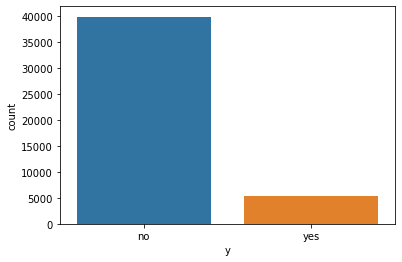

In [75]:
import seaborn as sns
sns.countplot(x='y',data=df)

In [76]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [77]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
officetype,39.813872,1319.853237,15.910960,257.243754,2.840277,40.439902,0.571442
other,45.688317,1635.199472,15.588526,267.691944,2.611056,35.020772,0.558633


In [78]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
graduate,40.783111,1355.226715,15.806223,258.199451,2.760184,40.34096,0.584260
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.85622,0.488422


In [79]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
NP,37.198366,1266.018948,15.733733,265.346224,2.644330,43.596155,0.616269
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552


In [80]:
#Output variable -> y
#y -> Whether the client has subscribed a term deposit or not 

In [81]:
#divide variables into input and output variables
X=df.iloc[:,0:16]
Y=df.iloc[:,16:]

In [82]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,officetype,married,graduate,no,2143,yes,no,unknown,5,firsthalf,261,1,-1,0,unknown
1,44,officetype,NP,graduate,no,29,yes,no,unknown,5,firsthalf,151,1,-1,0,unknown
2,33,other,married,graduate,no,2,yes,yes,unknown,5,firsthalf,76,1,-1,0,unknown
3,47,officetype,married,unknown,no,1506,yes,no,unknown,5,firsthalf,92,1,-1,0,unknown
4,33,other,NP,unknown,no,1,no,no,unknown,5,firsthalf,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,officetype,married,graduate,no,825,no,no,verbal,17,sechalf,977,3,-1,0,unknown
45207,71,other,NP,graduate,no,1729,no,no,verbal,17,sechalf,456,2,-1,0,unknown
45208,72,other,married,graduate,no,5715,no,no,verbal,17,sechalf,1127,5,184,3,success
45209,57,officetype,married,graduate,no,668,no,no,verbal,17,sechalf,508,4,-1,0,unknown


In [83]:
#drop columns which cannot be divided into 2 outputs
#X=X.drop('job',axis=1)
#X=X.drop('month',axis=1)
X=X.drop('poutcome', axis=1)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,officetype,married,graduate,no,2143,yes,no,unknown,5,firsthalf,261,1,-1,0
1,44,officetype,NP,graduate,no,29,yes,no,unknown,5,firsthalf,151,1,-1,0
2,33,other,married,graduate,no,2,yes,yes,unknown,5,firsthalf,76,1,-1,0
3,47,officetype,married,unknown,no,1506,yes,no,unknown,5,firsthalf,92,1,-1,0
4,33,other,NP,unknown,no,1,no,no,unknown,5,firsthalf,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,officetype,married,graduate,no,825,no,no,verbal,17,sechalf,977,3,-1,0
45207,71,other,NP,graduate,no,1729,no,no,verbal,17,sechalf,456,2,-1,0
45208,72,other,married,graduate,no,5715,no,no,verbal,17,sechalf,1127,5,184,3
45209,57,officetype,married,graduate,no,668,no,no,verbal,17,sechalf,508,4,-1,0


In [84]:
X['marital']=pd.get_dummies(X.marital)
X['education']=pd.get_dummies(X.education)
X['default']=pd.get_dummies(X.default)
X['housing']=pd.get_dummies(X.housing)
X['loan']=pd.get_dummies(X.loan)
X['contact']=pd.get_dummies(X.contact)
X['job']=pd.get_dummies(X.job)
X['month']=pd.get_dummies(X.month)

In [85]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,0,0,1,1,2143,0,1,1,5,1,261,1,-1,0
1,44,0,1,1,1,29,0,1,1,5,1,151,1,-1,0
2,33,0,0,1,1,2,0,0,1,5,1,76,1,-1,0
3,47,0,0,0,1,1506,0,1,1,5,1,92,1,-1,0
4,33,0,1,0,1,1,1,1,1,5,1,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,1,1,825,1,1,0,17,0,977,3,-1,0
45207,71,0,1,1,1,1729,1,1,0,17,0,456,2,-1,0
45208,72,0,0,1,1,5715,1,1,0,17,0,1127,5,184,3
45209,57,0,0,1,1,668,1,1,0,17,0,508,4,-1,0


# Interpretation
- For marital 0 = married, 1 = NP
- For education 0 = unknown, 1 = graduate
- For default, no = 1, yes = 0
- For housing, yes = 0, no = 1
- For loan, yes = 0, no = 1
- For contact, unknown = 1, verbal = 0
- For month, first half = 1, sec half=0
- For jobs, officetype=0, other = 1

In [86]:
Y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
#prepare model and fit
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Megha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
classifier.coef_

array([[-2.40324458e-02, -3.38463900e-02, -1.10961760e-01,
        -3.50156146e-01, -3.11624122e-01,  3.08172379e-05,
         4.85393512e-01, -9.19383390e-02, -5.10050240e-01,
        -1.99020074e-02, -4.32731681e-01,  3.53711517e-03,
        -3.76247971e-01,  2.87995946e-03, -5.35958106e-02]])

# Interpretation
- With unit increase in the age of the client, there is 0.02 less chance for the client to subscribe a term deposit
- There is a 0.03 less chance for other job type client to subscribe for term deposit
- There is a 0.1 less chance for a single / divorced client to subscribe to a term deposit
- There is a 0.4 less chance for client whose education qualification is primary/secondary/tertiary to subscribe a term deposit.
-  There is 0.3 chance for the client to default subscribe to a term deposit
- With unit increase in the balane, there is 0.00003 greater chance for client to subscribe to term deposit
- There is 0.4 greater chance for a client with housing loan to subscribe to a term deposit
- There is 0.09 less chance for a client without loans to subscribe to a term deposit
- There is 0.5 less chance for a client contacted via other means than verbal to subscribe to a term deposit
- With every unit increase from the day, there is 0.019 less chance for the client to subscribe to a term deposit
- There is 0.4 less chance for client to subscribe to term deposit when contacted during the first half of the year
- With every unit increase in the contact duration, there is 0.003 less chance for the client to subscribe to a term deposit
- WIth every unit increase in the campaign day, there is 0.3 less chance for the client to subscribe to a term deposit
- With every unit increase from the last contacted day, there is 0.002 greater chance for the client to subscribe to a term deposit
- WIth every unit increase in the campaign before this contact, there is 0.05 less chance for the client to sibscribe to a term deposit

In [90]:
classifier.intercept_

array([-0.33570925])

In [91]:
classifier.classes_

array(['no', 'yes'], dtype=object)

In [92]:
classifier.predict_proba(X)

array([[0.94860742, 0.05139258],
       [0.95868112, 0.04131888],
       [0.94993625, 0.05006375],
       ...,
       [0.50559227, 0.49440773],
       [0.88107496, 0.11892504],
       [0.77966751, 0.22033249]])

In [93]:
classifier.score(X,Y)

0.8885890601844684

In [94]:
#predict for X dataset
y_pred=classifier.predict(X)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [95]:
y_pred_df=Y
y_pred_df

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [96]:
y_pred_df=y_pred_df.rename({'y':'actual'},axis=1)

In [97]:
y_pred_df['Predicted']=y_pred
y_pred_df

,actual,Predicted
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
...,...,...
45206,yes,yes
45207,yes,no
45208,yes,no
45209,no,no


In [98]:
#confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y,y_pred)
cm

array([[39227,   695],
       [ 4342,   947]], dtype=int64)

In [99]:
#the values in the left diagonal are correctly predicted by the model. The more values in the left diagonal, the better the model

In [100]:
#checking score
(39158+1013)/(764+39158+4276+1013)

0.8885227046515228

In [101]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     39922
         yes       0.58      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [102]:
y_pred_df

,actual,Predicted
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
...,...,...
45206,yes,yes
45207,yes,no
45208,yes,no
45209,no,no


In [103]:
y_pred_df['actual']=pd.get_dummies(y_pred_df.actual)
y_pred_df['Predicted']=pd.get_dummies(y_pred_df.Predicted)
y_pred_df

,actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
45206,0,0
45207,0,1
45208,0,1
45209,1,1


0.580820956414261


Text(0, 0.5, 'True Positive Rate')

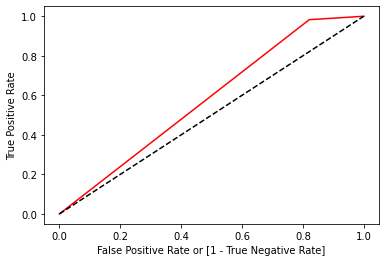

In [109]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_pred_df.actual, y_pred_df.Predicted)

auc = roc_auc_score(y_pred_df.actual, y_pred_df.Predicted)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [434]:
auc

0.4138038640275745